# Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# loading data

In [2]:
data = pd.read_csv('Marketing_train.csv')

In [3]:
data.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,responded
0,55.0,admin.,single,university.degree,unknown,no,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
1,NaN,blue-collar,married,NaN,no,no,no,cellular,jul,mon,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
2,42.0,technician,married,high.school,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,55.0,management,divorced,NaN,unknown,yes,yes,cellular,jul,wed,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
4,NaN,admin.,divorced,university.degree,no,yes,no,cellular,may,tue,5,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1,no


.There are missing values
.There are unknown values for many variables in the dataset
.Variables with unknown/missing values are : 'schooling	', 'profession', 'housing', 'loan', 'deafult', and 'marital

# Convert target variable into numeric

In [4]:
data.responded = data.responded.map({'no':0, 'yes':1}).astype('uint8')

# drop marital and contact columns

In [5]:
data.drop(['marital'],axis=1, inplace=True)
data.drop(['contact'],axis=1, inplace=True)
data.head()

,custAge,profession,schooling,default,housing,loan,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,responded
0,55.0,admin.,university.degree,unknown,no,no,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0
1,NaN,blue-collar,NaN,no,no,no,jul,mon,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,0
2,42.0,technician,high.school,no,no,no,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,55.0,management,NaN,unknown,yes,yes,jul,wed,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
4,NaN,admin.,university.degree,no,yes,no,may,tue,5,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1,0


# changing categorical variable to numerical variable

In [6]:
data[['default','housing','loan']]=data[['default','housing','loan']].replace(["yes","no"],["1","0"])
data['month']=data['month'].replace(["jan","feb","mar","apr","may","jun","jul", "aug","sep","oct","nov","dec"],["1","2","3","4","5","6","7","8","9","10","11","12"])
data['profession']=data['profession'].replace(['unknown'],['other'])

data.head()

,custAge,profession,schooling,default,housing,loan,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,responded
0,55.0,admin.,university.degree,unknown,0,0,11,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0
1,NaN,blue-collar,NaN,0,0,0,7,mon,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,0
2,42.0,technician,high.school,0,0,0,5,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,55.0,management,NaN,unknown,1,1,7,wed,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
4,NaN,admin.,university.degree,0,1,0,5,tue,5,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1,0


In [7]:
data.drop(['default'],axis=1, inplace=True)
data.drop(['day_of_week'],axis=1, inplace=True)


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['profession']=le.fit_transform(data['profession'])
data['schooling']=le.fit_transform(data['schooling'])
data['poutcome']=le.fit_transform(data['poutcome'])

In [9]:
data.isnull().sum()

custAge           1804
profession           0
schooling            0
housing              0
loan                 0
month                0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
responded            0
dtype: int64

In [10]:
data['custAge'] = data['custAge'].fillna(data['custAge'].mean())

In [11]:
data.isnull().sum()

custAge           0
profession        0
schooling         0
housing           0
loan              0
month             0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
responded         0
dtype: int64

#Visualizing the data

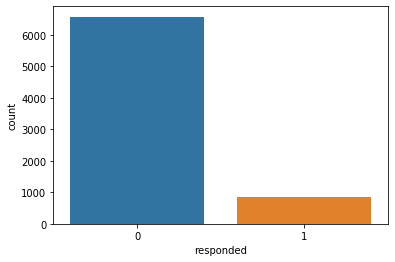

In [12]:
sns.countplot(x='responded', data=data);

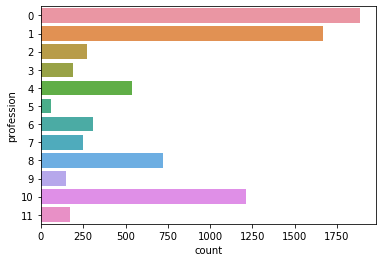

In [13]:
sns.countplot(y = 'profession', data = data);

In [14]:
data.schooling.value_counts()

8    2155
6    1554
3    1216
2     784
5     664
0     534
1     275
7     231
4       1
Name: schooling, dtype: int64

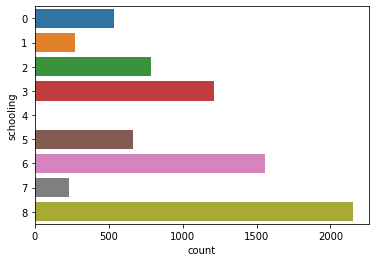

In [15]:
sns.countplot(y='schooling', data=data);

# Outliers

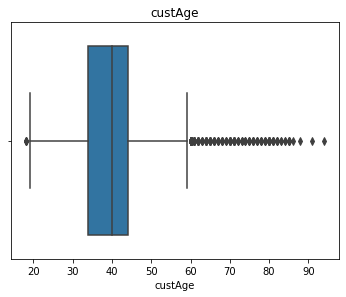

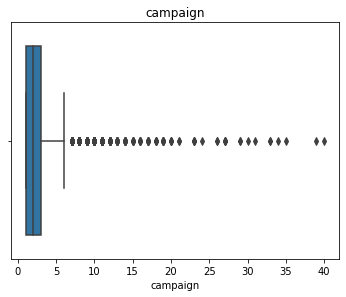

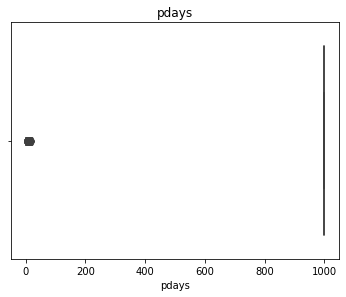

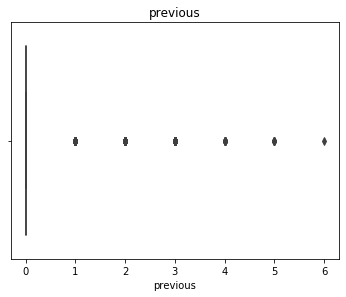

In [16]:
col=data[['custAge','campaign','pdays','previous']]
for i in col:
  n=1
  plt.figure(figsize=(20,20))
  plt.subplot(4,3,1)
  sns.boxplot(data[i])
  plt.title(i)
  plt.show()
  n=n+1


# Removing outliers

In [17]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data[['custAge','campaign','pdays','previous']]))
print(z)
data=data[(z<3).all(axis=1)]
data.shape


[[1.62976980e+00 5.63419312e-01 2.02121262e-01 3.56293544e-01]
 [7.72518975e-16 5.63419312e-01 2.02121262e-01 3.56293544e-01]
 [2.16378855e-01 5.63419312e-01 2.02121262e-01 3.56293544e-01]
 ...
 [1.41445685e+00 1.92344356e-01 2.02121262e-01 1.57891549e+00]
 [1.19488028e+00 1.92344356e-01 2.02121262e-01 3.56293544e-01]
 [2.18510666e-01 5.63419312e-01 2.02121262e-01 3.56293544e-01]]


(6837, 16)

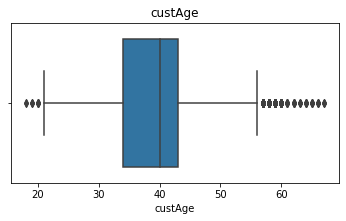

In [18]:
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(data['custAge'])
plt.title("custAge")
plt.show()

# seprating independent and dependent variable

In [19]:
x=data.drop(['responded'],axis=1)
y=data['responded']           
data['responded'].value_counts()

0    6229
1     608
Name: responded, dtype: int64

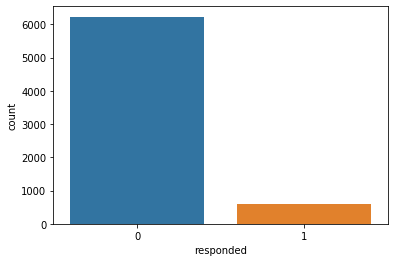

In [20]:
sns.countplot(x='responded',data=data);

# Logistic Regression

In [21]:
x_feature = list(data.columns)
x_feature.remove('responded')
x_feature

['custAge',
 'profession',
 'schooling',
 'housing',
 'loan',
 'month',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [22]:
data['responded'].value_counts(normalize=True)*100

0    91.107211
1     8.892789
Name: responded, dtype: float64

In [23]:
encoded_data = pd.get_dummies(data[x_feature],drop_first=True)

In [24]:
y = data['responded']
x = encoded_data

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8, random_state =42)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
log_reg = LogisticRegression(max_iter=200,solver='newton-cg')

In [29]:
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=200, solver='newton-cg')

In [30]:
y_pred = log_reg.predict(x_test)

In [31]:
from sklearn import metrics

In [32]:
metrics.accuracy_score(y_test,y_pred)

0.9093567251461988

In [33]:
metrics.precision_score(y_test,y_pred)

0.5333333333333333

In [34]:
metrics.recall_score(y_test,y_pred)

0.064

In [35]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1243
           1       0.53      0.06      0.11       125

    accuracy                           0.91      1368
   macro avg       0.72      0.53      0.53      1368
weighted avg       0.88      0.91      0.88      1368



In [36]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[1236,    7],
       [ 117,    8]], dtype=int64)

In [37]:
def confusion_matrix(actuals, predicted):
    cm = metrics.confusion_matrix(actuals, predicted, [1,0])
    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Good Credit', 'Bad Credit'], yticklabels = ['Good Credit', 'Bad Credit'])

    plt.ylabel("Actual Labels")
    plt.xlabel("Predicted Labels")

    plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


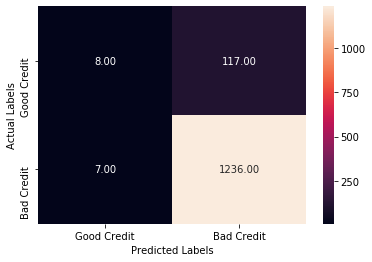

In [38]:
confusion_matrix(y_test, y_pred)

# Handling imbalanced data

To get rid of data imblance use:
1. Upsampling or downsampling(least used)
2. SMOTE

In [39]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# upsampling

In [40]:
x_train_u,y_train_u = resample(x_train[y_train==1], y_train[y_train==1],n_samples = x_train[y_train==0].shape[0],random_state=1)

In [41]:
x_train[y_train==1]

,custAge,profession,schooling,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,...,loan_unknown,month_11,month_12,month_3,month_4,month_5,month_6,month_7,month_8,month_9
274,36.000000,10,3,1,999,0,1,-1.8,92.893,-46.2,...,0,0,0,0,0,1,0,0,0,0
1444,29.000000,0,6,1,999,0,1,-2.9,92.963,-40.8,...,0,0,0,0,0,0,1,0,0,0
4224,40.009804,10,7,3,999,0,1,-1.1,94.767,-50.8,...,0,1,0,0,0,0,0,0,0,0
6000,40.009804,0,7,4,999,1,0,-3.4,92.379,-29.8,...,0,0,0,0,0,0,0,0,0,1
4926,35.000000,0,3,1,999,0,1,-1.8,92.893,-46.2,...,0,0,0,0,0,1,0,0,0,0
2455,21.000000,9,3,3,999,0,1,-1.8,92.893,-46.2,...,0,0,0,0,0,1,0,0,0,0
5441,33.000000,0,5,1,999,1,0,-1.8,92.893,-46.2,...,0,0,0,0,0,1,0,0,0,0
888,34.000000,10,6,1,999,0,1,-0.1,93.200,-42.0,...,0,1,0,0,0,0,0,0,0,0
1711,37.000000,1,3,3,999,0,1,-1.8,93.075,-47.1,...,0,0,0,0,1,0,0,0,0,0
4772,34.000000,11,3,2,999,0,1,-0.1,93.200,-42.0,...,0,1,0,0,0,0,0,0,0,0


In [42]:
x_train[y_train==0]

,custAge,profession,schooling,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,...,loan_unknown,month_11,month_12,month_3,month_4,month_5,month_6,month_7,month_8,month_9
2428,30.000000,9,2,1,999,0,1,1.1,93.994,-36.4,...,0,0,0,0,0,1,0,0,0,0
1043,47.000000,1,0,5,999,0,1,1.1,93.994,-36.4,...,0,0,0,0,0,1,0,0,0,0
862,39.000000,0,6,4,999,0,1,1.4,93.444,-36.1,...,0,0,0,0,0,0,0,0,1,0
2626,53.000000,1,2,5,999,0,1,1.1,93.994,-36.4,...,0,0,0,0,0,1,0,0,0,0
2404,30.000000,8,3,2,999,0,1,-1.8,92.893,-46.2,...,0,0,0,0,0,1,0,0,0,0
951,40.009804,1,5,2,999,0,1,-1.8,93.075,-47.1,...,0,0,0,0,1,0,0,0,0,0
6802,42.000000,4,7,2,999,0,1,-2.9,92.201,-31.4,...,0,0,0,0,0,0,0,0,1,0
3853,26.000000,1,1,1,999,0,1,1.4,94.465,-41.8,...,0,0,0,0,0,0,1,0,0,0
6384,30.000000,3,8,1,999,0,1,1.1,93.994,-36.4,...,0,0,0,0,0,1,0,0,0,0
4092,36.000000,0,8,6,999,0,1,-1.8,92.893,-46.2,...,0,0,0,0,0,1,0,0,0,0


In [43]:
x_train_u = np.concatenate((x_train[y_train==0],x_train_u))
y_train_u = np.concatenate((y_train[y_train==0],y_train_u))

In [44]:
print(x_train_u.shape)
print(y_train_u.shape)


(9972, 25)
(9972,)


In [45]:
log_reg_up = LogisticRegression(max_iter=200)

In [46]:
log_reg_up.fit(x_train_u,y_train_u)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=200)

In [47]:
print(metrics.classification_report(y_test,log_reg_up.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87      1243
           1       0.24      0.64      0.35       125

    accuracy                           0.78      1368
   macro avg       0.60      0.72      0.61      1368
weighted avg       0.89      0.78      0.82      1368



# upsampling using SMOTE

In [48]:

sm = SMOTE(random_state=12)
x_train_sm,y_train_sm = sm.fit_resample(x_train,y_train)

In [49]:
log_reg_sm = LogisticRegression(max_iter=500)

In [50]:
log_reg_sm.fit(x_train_sm,y_train_sm)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=500)

In [51]:
print(metrics.classification_report(y_test,log_reg_sm.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      1243
           1       0.21      0.55      0.31       125

    accuracy                           0.77      1368
   macro avg       0.58      0.67      0.59      1368
weighted avg       0.88      0.77      0.81      1368



# downsampling

In [52]:

x_train_d,y_train_d = resample(x_train[y_train==0], y_train[y_train==0],n_samples = x_train[y_train==1].shape[0],random_state=1)

In [53]:
x_train_d = np.concatenate((x_train[y_train==1],x_train_d))
y_train_d = np.concatenate((y_train[y_train==1],y_train_d))

In [54]:
print(x_train_d.shape)
print(y_train_d.shape)


(966, 25)
(966,)


In [55]:
log_reg_d = LogisticRegression(max_iter=500)


In [56]:
log_reg_d.fit(x_train_d,y_train_d)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=500)

In [57]:
print(metrics.classification_report(y_test,log_reg_d.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      1243
           1       0.23      0.66      0.34       125

    accuracy                           0.77      1368
   macro avg       0.59      0.72      0.60      1368
weighted avg       0.89      0.77      0.81      1368



# ROC CURVE FOR LOGISTIC REGRESSION

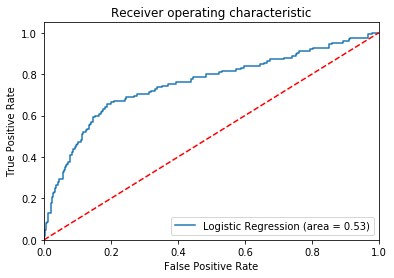

In [58]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, log_reg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# ROC CURVE FOR UPSAMPLING

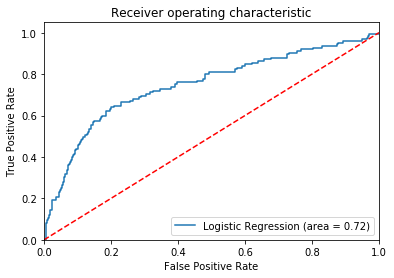

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, log_reg_up.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg_up.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# ROC CURVE FOR SMOTE

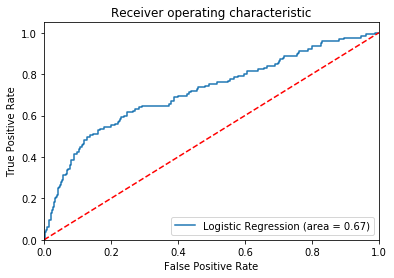

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, log_reg_sm.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg_sm.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# ROC CURVE FOR DOWNSAMPLING

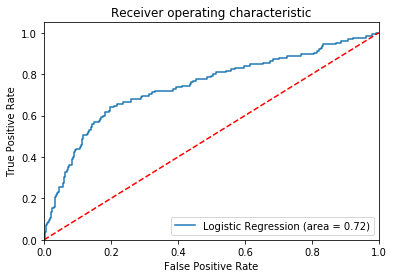

In [61]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, log_reg_d.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg_d.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# conclusion :
By applying logistic Regression gave 91% accuracy.
After Balancing Upsampling gave 78% accuracy with f1 score 0 :0.87 and 1 :0.35
Using Smote gave 77% accuracy with f1 score 0 : 0.87 and 1 : 0.31
Using Downsampling gave 77% accuracy with f1 score 0 : 0.86 and 0.34

We can say Upsampling is best for prediction 


# KNN Alogrithm

In [62]:
x_feature = list(data.columns)
x_feature.remove('responded')
x_feature

['custAge',
 'profession',
 'schooling',
 'housing',
 'loan',
 'month',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [63]:
data['responded'].value_counts(normalize=True)*100

0    91.107211
1     8.892789
Name: responded, dtype: float64

In [64]:
encoded_data = pd.get_dummies(data[x_feature],drop_first=True)

In [65]:
y = data['responded']
x = encoded_data

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8, random_state =42)

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
knn_classifier = KNeighborsClassifier()

In [70]:
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [71]:
knn_classifier.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [72]:
y_pred = knn_classifier.predict(x_test)

In [73]:
from sklearn.metrics import classification_report 

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1243
           1       0.38      0.10      0.16       125

    accuracy                           0.90      1368
   macro avg       0.65      0.54      0.56      1368
weighted avg       0.87      0.90      0.88      1368



In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
from sklearn.metrics import roc_curve

In [77]:
tunned_parameters = [{'n_neighbors': [3,5,7,9], 'metric': ['minkowski', 'euclidean']}] 

In [78]:
clf = GridSearchCV(KNeighborsClassifier(), tunned_parameters, cv = 5, scoring ='roc_auc') 

In [79]:
clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['minkowski', 'euclidean'],
                          'n_neighbors': [3, 5, 7, 9]}],
             scoring='roc_auc')

This shows k=9 is better and metric minkowski gave greater value thn eulidean

In [80]:
clf.best_params_

{'metric': 'minkowski', 'n_neighbors': 9}

In [81]:
clf.best_score_

0.6789653080102307

# DecisionTreeClassifier

In [82]:
x_feature = list(data.columns)
x_feature.remove('responded')
x_feature

['custAge',
 'profession',
 'schooling',
 'housing',
 'loan',
 'month',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [83]:
data['responded'].value_counts(normalize=True)*100

0    91.107211
1     8.892789
Name: responded, dtype: float64

In [84]:
encoded_data = pd.get_dummies(data[x_feature],drop_first=True)

In [85]:
y = data['responded']
x = encoded_data

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8, random_state =42)

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
dt_cerdit = DecisionTreeClassifier()

In [90]:
dt_cerdit.fit(x_train,y_train)

DecisionTreeClassifier()

In [91]:
y_pred = dt_cerdit.predict(x_test)

In [92]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1243
           1       0.22      0.21      0.21       125

    accuracy                           0.86      1368
   macro avg       0.57      0.57      0.57      1368
weighted avg       0.86      0.86      0.86      1368



In [95]:
from sklearn.tree import plot_tree

[Text(66.85901277524222, 214.57894736842104, 'X[11] <= 5087.65\ngini = 0.161\nsamples = 5469\nvalue = [4986, 483]'),
 Text(15.827230300187619, 208.85684210526315, 'X[10] <= 0.698\ngini = 0.46\nsamples = 446\nvalue = [286, 160]'),
 Text(5.025140712945592, 203.13473684210527, 'X[5] <= 0.5\ngini = 0.465\nsamples = 49\nvalue = [18, 31]'),
 Text(4.020112570356473, 197.41263157894736, 'X[3] <= 2.5\ngini = 0.353\nsamples = 35\nvalue = [8, 27]'),
 Text(3.517598499061914, 191.69052631578947, 'X[2] <= 6.5\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(2.512570356472796, 185.96842105263158, 'X[0] <= 43.005\ngini = 0.346\nsamples = 18\nvalue = [4, 14]'),
 Text(2.0100562851782366, 180.24631578947367, 'X[2] <= 4.0\ngini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(1.0050281425891183, 174.52421052631578, 'X[10] <= 0.645\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.5025140712945592, 168.8021052631579, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(1.5075422138836774, 168.802105263

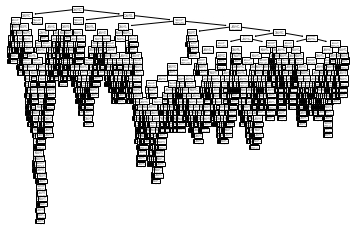

In [96]:
plot_tree(dt_cerdit)

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
tunned_parameters = {'criterion':['entropy','gini'], 'max_depth':range(2,10)}

In [99]:
dt_cv = DecisionTreeClassifier()

In [100]:
clf = GridSearchCV(dt_cv,tunned_parameters,cv=10,scoring='accuracy')

In [101]:
clf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(2, 10)},
             scoring='accuracy')

In [102]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [103]:
dt_cerdit_cv = DecisionTreeClassifier(criterion='gini',max_depth=4)

In [104]:
dt_cerdit_cv.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [105]:
y_pred_cv = dt_cerdit_cv.predict(x_test)

In [106]:
print(metrics.classification_report(y_test,y_pred_cv))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1243
           1       0.58      0.06      0.10       125

    accuracy                           0.91      1368
   macro avg       0.75      0.53      0.53      1368
weighted avg       0.88      0.91      0.87      1368



In [107]:
y_pred_cv_train = dt_cerdit_cv.predict(x_train)

In [108]:
print(metrics.classification_report(y_train,y_pred_cv_train))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      4986
           1       0.75      0.08      0.15       483

    accuracy                           0.92      5469
   macro avg       0.83      0.54      0.55      5469
weighted avg       0.90      0.92      0.88      5469

